In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [13]:
fname_perf = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/chains_DDF_perfect_validation_lowz_withbias.csv.gz'
data_perf = pd.read_csv(fname_perf)
data_perf['sample'] = 'Perfect'

fname_val = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/chains_DDF_validation_lowz_withbias.csv.gz'
data_val = pd.read_csv(fname_val)
data_val['sample'] = 'Full validation'

fname_unc_b1 = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/chains_UncSampling_20_lowz_withbias.csv.gz'
data_unc_b1 = pd.read_csv(fname_unc_b1)
data_unc_b1['sample'] = 'UncSampling batch 1'

fname_unc_bN = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/chains_UncSampling_20_ba_lowz_withbias.csv.gz'
data_unc_bN = pd.read_csv(fname_unc_b1)
data_unc_bN['sample'] = 'UncSampling batch None'

fname_rand_b1 = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/chains_RandomSampling_20_lowz_withbias.csv.gz'
data_rand_b1 = pd.read_csv(fname_rand_b1)
data_rand_b1['sample'] = 'RandomSampling batch 1'

fname_rand_bN = '/media/RESSPECT/data/PLAsTiCC/for_pipeline/DDF/cosmo_results/posteriors/csv/chains_RandomSampling_20_ba_lowz_withbias.csv.gz'
data_rand_bN = pd.read_csv(fname_rand_bN)
data_rand_bN['sample'] = 'RandomSampling batch None'

data = pd.concat([data_perf, data_val, data_unc_b1, data_unc_bN], ignore_index=True)

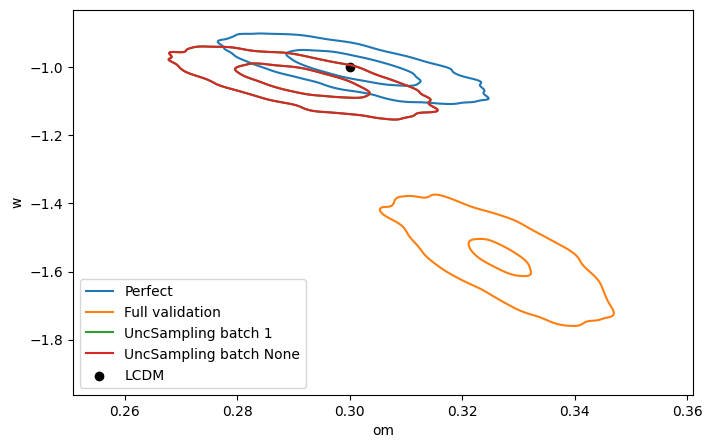

In [14]:
_, ax = plt.subplots(figsize=(8, 5))


g = sns.kdeplot(data=data, x="om", y="w", levels=3, hue='sample', ax=ax)
p = ax.scatter(0.3, -1, marker='o', color='black', label='LCDM')

extra_legend_elements = [p]
handles = ax.legend_.legend_handles

for h, t in zip(handles, ax.legend_.texts):
    h.set_label(t.get_text())  # assign the legend labels to the handles
ax.legend(handles=handles + extra_legend_elements, loc="lower left")
plt.show()